<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/dos%20results%20ver%201/final%20models/fft_r1_model_single.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201/router%20fetch/fft-r1-train.csv?token=AKVFSODWB4TNVPOZTGCD2UC6Y6FLY')
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201/router%20fetch/fft-r1-mal-1.csv?token=AKVFSOCEFO5KEAUA37PWBPS6Y6FL2')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201/router%20fetch/fft-r1-mal-2.csv?token=AKVFSODIQ3JWY2R5ZQHFDTS6Y6FMA')

In [4]:
cols = list(df.columns)
a, b = cols.index('sim'), cols.index('target')
cols[b], cols[a] = cols[a], cols[b]
a, b = cols.index('sim_traversal'), cols.index('target')
cols[b], cols[a] = cols[a], cols[b]
df = df[cols]
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,sim,sim_traversal,target
0,11,2,4,1,1,4,3,9,0,0,23,7,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9,1,1,1
1,11,2,4,1,1,4,3,9,0,0,23,7,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9,1,1,0
2,84,4,2,1,1,4,3,9,3,3,24,8,4,5,2,0.400000,12,1,2,2,2,4,8,1,4,16,3,27,9,1,4,0
3,84,4,2,1,1,4,3,9,3,3,24,8,3,5,2,0.400000,12,1,2,2,2,4,8,1,4,12,3,27,9,1,3,1
4,216,2,4,1,1,4,3,9,0,0,22,6,6,3,1,0.333333,8,1,1,1,1,1,8,1,4,24,3,27,9,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108206,3268816,4,2,6,2,2,3,9,18,2,20,4,20042,3,1,0.333333,15,5,1,5,5,25,8,12,24,481008,18,27,54,1,20042,1
108207,3268823,4,2,6,3,2,3,9,18,2,20,4,20042,3,1,0.333333,22,4,2,5,8,40,8,18,36,721512,18,27,54,1,20042,1
108208,3268830,4,2,6,4,2,3,9,18,2,20,4,20042,3,1,0.333333,29,3,3,5,9,45,8,24,48,962016,18,27,54,1,20042,1
108209,3268837,4,2,6,5,3,3,9,18,2,20,4,20042,3,1,0.333333,36,2,4,5,8,40,8,30,90,1803780,18,27,54,1,20042,1


In [5]:
cols = list(df1.columns)
a, b = cols.index('sim'), cols.index('target')
cols[b], cols[a] = cols[a], cols[b]
a, b = cols.index('sim_traversal'), cols.index('target')
cols[b], cols[a] = cols[a], cols[b]
df1 = df1[cols]
df1

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,sim,sim_traversal,target
0,7,2,0,1,1,4,3,9,1,1,23,7,2,3,0,0.000000,4,8,1,8,8,64,0,1,4,8,3,27,9,1,2,0
1,11,2,4,1,1,4,3,9,0,0,23,7,1,4,1,0.250000,8,7,2,8,14,112,8,1,4,4,3,27,9,1,1,0
2,84,0,1,4,1,1,5,17,23,7,1,1,2,3,3,1.000000,16,6,3,8,18,144,0,4,4,8,20,85,100,1,2,0
3,84,4,2,1,1,4,3,9,3,3,24,8,4,5,2,0.400000,12,5,4,8,20,160,8,1,4,16,3,27,9,1,4,0
4,85,0,1,4,2,2,5,17,23,7,1,1,2,3,3,1.000000,17,4,5,8,20,160,0,8,16,32,20,85,100,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127845,3270078,4,2,6,2,2,3,9,18,2,20,4,30070,3,1,0.333333,15,4,2,5,8,40,8,12,24,721680,18,27,54,1,30070,0
127846,3270085,4,2,6,3,2,3,9,18,2,20,4,30070,3,1,0.333333,22,3,3,5,9,45,8,18,36,1082520,18,27,54,1,30070,0
127847,3270092,4,2,6,4,2,3,9,18,2,20,4,30070,3,1,0.333333,29,2,4,5,8,40,8,24,48,1443360,18,27,54,1,30070,0
127848,3270099,4,2,6,5,3,3,9,18,2,20,4,30070,3,1,0.333333,36,1,5,5,5,25,8,30,90,2706300,18,27,54,1,30070,0


In [6]:
cols = list(df2.columns)
a, b = cols.index('sim'), cols.index('target')
cols[b], cols[a] = cols[a], cols[b]
a, b = cols.index('sim_traversal'), cols.index('target')
cols[b], cols[a] = cols[a], cols[b]
df2 = df2[cols]
df2

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,sim,sim_traversal,target
0,11,2,4,1,1,4,3,9,0,0,23,7,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9,1,1,0
1,84,4,2,1,1,4,3,9,3,3,24,8,4,5,2,0.400000,12,1,2,2,2,4,8,1,4,16,3,27,9,1,4,0
2,238,2,4,1,1,4,3,9,0,0,22,6,9,3,1,0.333333,8,1,1,1,1,1,8,1,4,36,3,27,9,1,9,0
3,365,2,4,1,1,4,3,9,0,0,23,7,12,4,1,0.250000,8,1,1,1,1,1,8,1,4,48,3,27,9,1,12,0
4,386,1,2,1,1,4,3,9,3,3,21,5,13,3,2,0.666667,12,1,1,1,1,1,2,1,4,52,3,27,9,1,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69448,3276626,4,2,6,2,2,3,9,18,2,20,4,30066,3,1,0.333333,15,1,1,1,1,1,8,12,24,721584,18,27,54,1,30066,0
69449,3276633,4,2,6,3,2,3,9,18,2,20,4,30066,3,1,0.333333,22,1,1,1,1,1,8,18,36,1082376,18,27,54,1,30066,0
69450,3276640,4,2,6,4,2,3,9,18,2,20,4,30066,3,1,0.333333,29,1,1,1,1,1,8,24,48,1443168,18,27,54,1,30066,0
69451,3276647,4,2,6,5,3,3,9,18,2,20,4,30066,3,1,0.333333,36,1,1,1,1,1,8,30,90,2705940,18,27,54,1,30066,0


In [7]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
sim                           0
sim_traversal                 0
target  

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router'])

In [9]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,sim,sim_traversal,target
outport,1.000000,-0.459807,0.237770,0.029889,-0.044490,NaN,0.255669,-0.060509,-0.055797,-0.028973,0.242957,-0.157727,-0.569855,0.003471,-0.051228,0.136610,0.055251,0.062876,0.044747,0.431340,0.129405,0.103778,0.059824,0.237770,0.255669,0.237770,NaN,-0.028973,-0.005102
inport,-0.459807,1.000000,-0.206231,0.058969,-0.087775,NaN,-0.446856,0.346364,0.344889,0.033701,0.275137,0.136175,0.184449,0.096469,-0.015962,-0.194196,-0.135994,-0.145334,-0.136597,0.497773,-0.038854,-0.053851,-0.022035,-0.206231,-0.446856,-0.206231,NaN,0.033701,0.112608
cache_coherence_type,0.237770,-0.206231,1.000000,0.392189,-0.583770,NaN,-0.154613,-0.254073,-0.096441,0.005233,-0.075224,-0.144149,-0.172721,-0.454639,0.077631,-0.031095,0.030113,0.045478,0.038870,-0.010133,0.561699,0.445065,0.328801,1.000000,-0.154613,1.000000,NaN,0.005233,-0.034337
flit_id,0.029889,0.058969,0.392189,1.000000,-0.059316,NaN,-0.253339,0.173129,0.051807,0.020819,0.055451,0.007319,-0.019434,0.531920,0.044909,0.021566,0.043016,0.065623,0.039369,0.051193,0.974346,0.938132,0.719660,0.392189,-0.253339,0.392189,NaN,0.020819,0.014935
flit_type,-0.044490,-0.087775,-0.583770,-0.059316,1.000000,NaN,0.377094,-0.257701,-0.077114,-0.030988,-0.082539,-0.010894,0.028927,0.546763,-0.137276,0.211514,0.048039,0.005710,0.003372,-0.076200,-0.160867,0.094800,0.067145,-0.583770,0.377094,-0.583770,NaN,-0.030988,-0.022230
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,0.255669,-0.446856,-0.154613,-0.253339,0.377094,NaN,1.000000,-0.282760,-0.123635,-0.016882,-0.248245,-0.420349,-0.340758,0.018160,-0.030374,0.242122,0.137022,0.128964,0.119385,-0.313066,-0.226644,-0.137699,-0.116813,-0.154613,1.000000,-0.154613,NaN,-0.016882,-0.049744
dst_ni,-0.060509,0.346364,-0.254073,0.173129,-0.257701,NaN,-0.282760,1.000000,0.803515,0.078248,0.668292,0.065501,-0.279667,0.216146,-0.025560,-0.119399,-0.093804,-0.064377,-0.070631,0.256230,0.092213,0.002682,0.041491,-0.254073,-0.282760,-0.254073,NaN,0.078248,0.078969
dst_router,-0.055797,0.344889,-0.096441,0.051807,-0.077114,NaN,-0.123635,0.803515,1.000000,0.098127,0.792175,-0.026875,-0.473368,0.052224,-0.106446,-0.050793,-0.101750,-0.102267,-0.102523,0.279517,0.005306,-0.013615,0.038959,-0.096441,-0.123635,-0.096441,NaN,0.098127,0.071653
traversal_id,-0.028973,0.033701,0.005233,0.020819,-0.030988,NaN,-0.016882,0.078248,0.098127,1.000000,0.071956,0.014618,-0.025590,0.029473,0.024670,0.024730,0.031966,0.022297,0.016694,0.010961,0.012686,0.007132,0.505255,0.005233,-0.016882,0.005233,NaN,1.000000,-0.052864


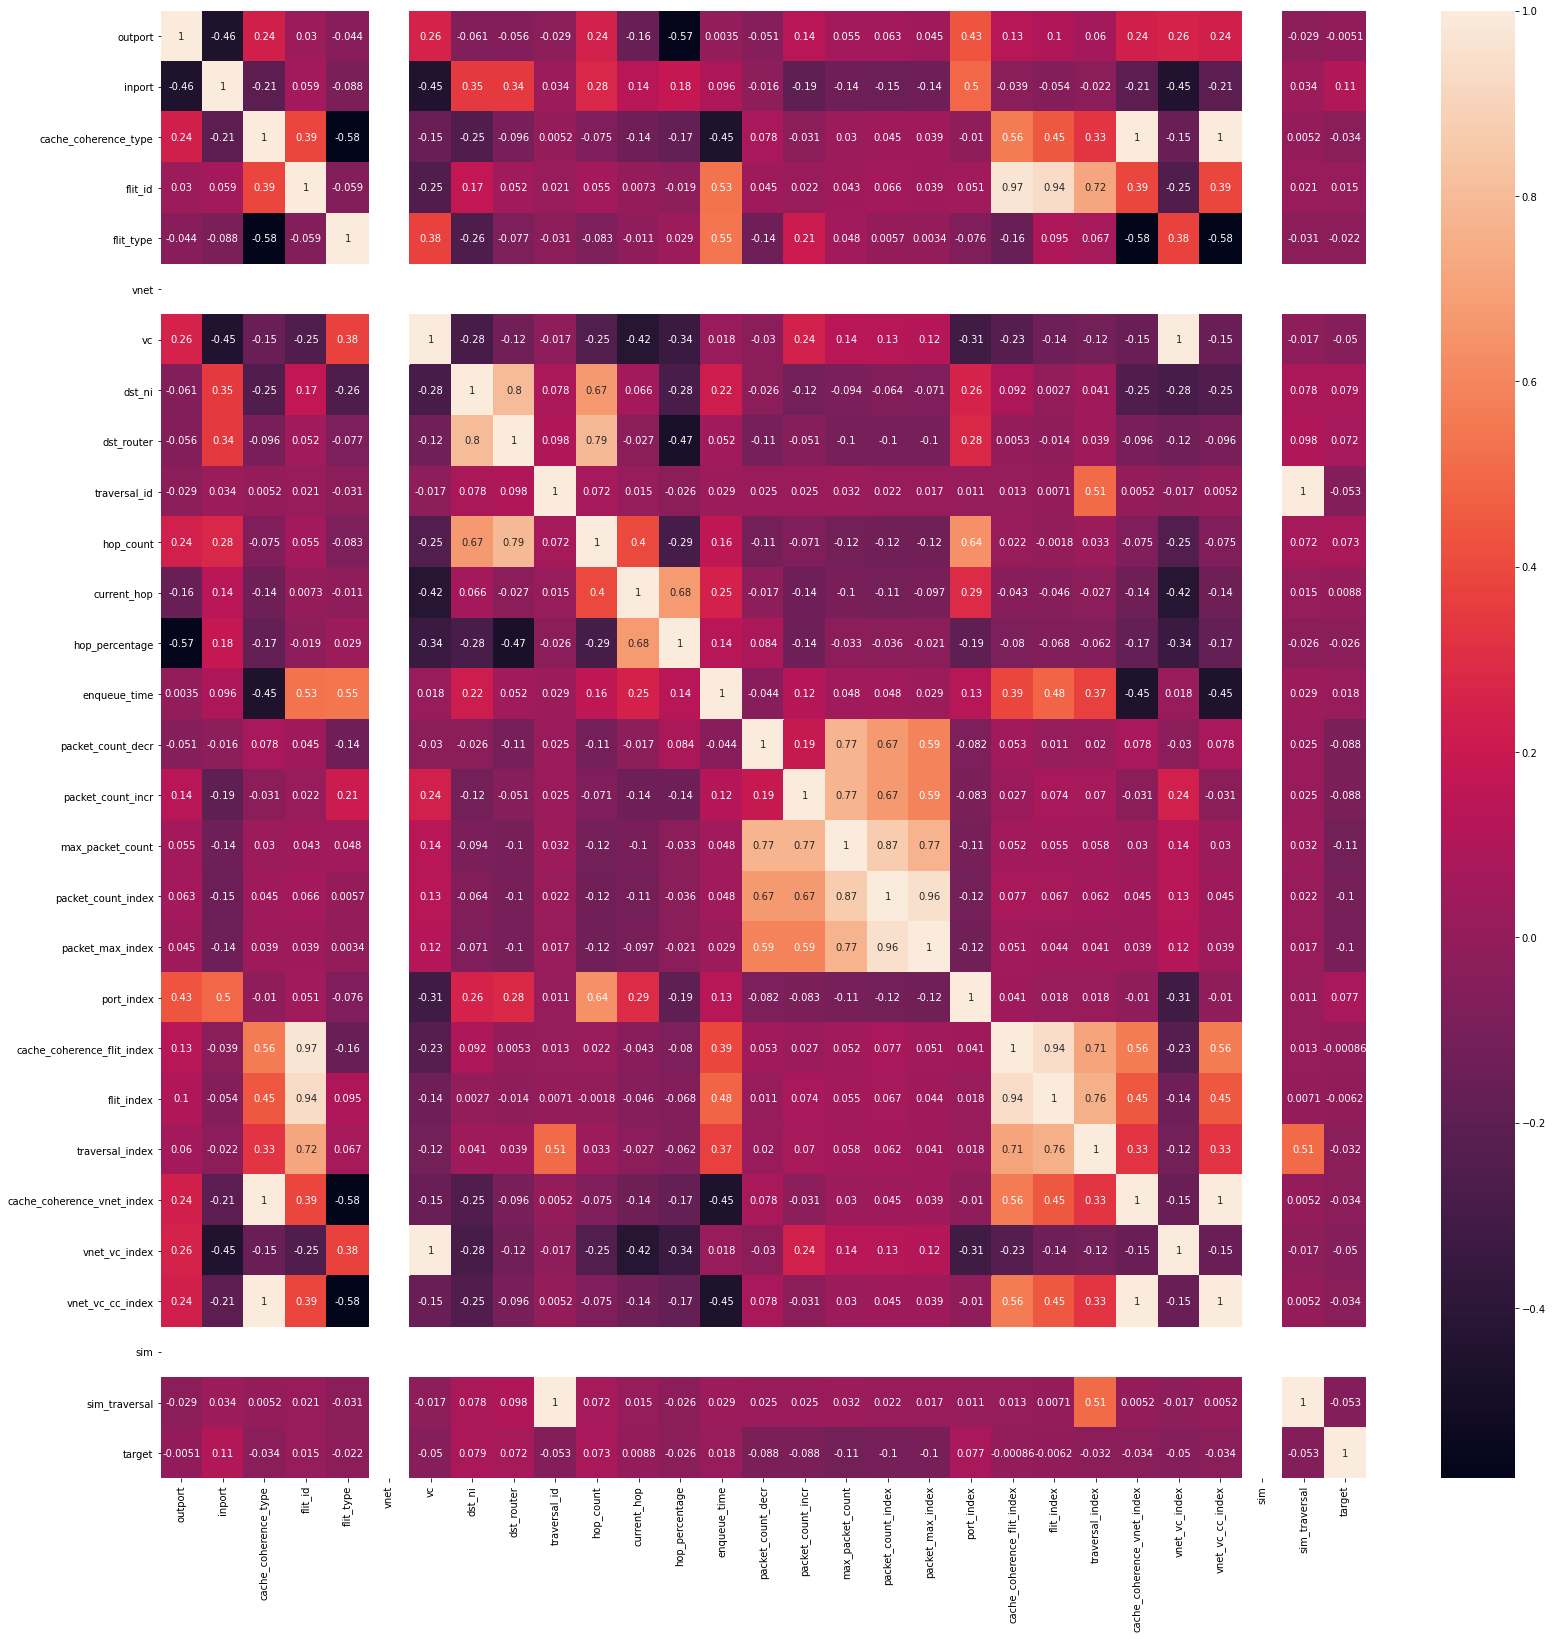

In [10]:
plt.figure(figsize=(27,27))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [11]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,sim,sim_traversal
0,2,4,1,1,4,3,9,23,7,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9,1,1
1,2,4,1,1,4,3,9,23,7,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9,1,1
2,4,2,1,1,4,3,9,24,8,4,5,2,0.400000,12,1,2,2,2,4,8,1,4,16,3,27,9,1,4
3,4,2,1,1,4,3,9,24,8,3,5,2,0.400000,12,1,2,2,2,4,8,1,4,12,3,27,9,1,3
4,2,4,1,1,4,3,9,22,6,6,3,1,0.333333,8,1,1,1,1,1,8,1,4,24,3,27,9,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108206,4,2,6,2,2,3,9,20,4,20042,3,1,0.333333,15,5,1,5,5,25,8,12,24,481008,18,27,54,1,20042
108207,4,2,6,3,2,3,9,20,4,20042,3,1,0.333333,22,4,2,5,8,40,8,18,36,721512,18,27,54,1,20042
108208,4,2,6,4,2,3,9,20,4,20042,3,1,0.333333,29,3,3,5,9,45,8,24,48,962016,18,27,54,1,20042
108209,4,2,6,5,3,3,9,20,4,20042,3,1,0.333333,36,2,4,5,8,40,8,30,90,1803780,18,27,54,1,20042


In [12]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,sim,sim_traversal
0,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.741935,0.466667,0.000000,0.6,0.5,0.250000,0.062500,0.034483,0.000000,0.034483,0.004184,0.000417,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.741935,0.466667,0.000000,0.6,0.5,0.250000,0.062500,0.034483,0.000000,0.034483,0.004184,0.000417,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,1.0,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.774194,0.533333,0.000143,0.8,1.0,0.400000,0.125000,0.000000,0.034483,0.034483,0.004184,0.000417,1.0,0.000000,0.000000,0.000006,0.000000,0.000000,0.000000,0.0,0.000143
3,1.0,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.774194,0.533333,0.000095,0.8,1.0,0.400000,0.125000,0.000000,0.034483,0.034483,0.004184,0.000417,1.0,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000,0.0,0.000095
4,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.709677,0.400000,0.000239,0.4,0.5,0.333333,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000011,0.000000,0.000000,0.000000,0.0,0.000239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108206,1.0,0.5,0.833333,0.25,0.333333,0.0,0.000000,0.645161,0.266667,0.956200,0.4,0.5,0.333333,0.171875,0.137931,0.000000,0.137931,0.016736,0.003334,1.0,0.379310,0.232558,0.255083,0.833333,0.000000,0.833333,0.0,0.956200
108207,1.0,0.5,0.833333,0.50,0.333333,0.0,0.000000,0.645161,0.266667,0.956200,0.4,0.5,0.333333,0.281250,0.103448,0.034483,0.137931,0.029289,0.005417,1.0,0.586207,0.372093,0.382626,0.833333,0.000000,0.833333,0.0,0.956200
108208,1.0,0.5,0.833333,0.75,0.333333,0.0,0.000000,0.645161,0.266667,0.956200,0.4,0.5,0.333333,0.390625,0.068966,0.068966,0.137931,0.033473,0.006112,1.0,0.793103,0.511628,0.510168,0.833333,0.000000,0.833333,0.0,0.956200
108209,1.0,0.5,0.833333,1.00,0.666667,0.0,0.000000,0.645161,0.266667,0.956200,0.4,0.5,0.333333,0.500000,0.034483,0.103448,0.137931,0.029289,0.005417,1.0,1.000000,1.000000,0.956567,0.833333,0.000000,0.833333,0.0,0.956200


In [13]:
train_X[train_X.duplicated()].shape

(371, 28)

In [0]:
test_X = df1.drop(columns=['target','timestamp','src_ni','src_router'])
test_Y = df1['target']
test_XX = df2.drop(columns=['target','timestamp','src_ni','src_router'])
test_YY = df2['target']

In [15]:
#standardization
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
test_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,sim,sim_traversal
0,0.5,0.00,0.000000,0.00,1.000000,0.0,0.000,0.741935,0.466667,0.000033,0.500000,0.0,0.000000,0.000000,0.205882,0.000000,0.205882,0.021672,0.005556,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000,0.0,0.000033
1,0.5,1.00,0.000000,0.00,1.000000,0.0,0.000,0.741935,0.466667,0.000000,0.666667,0.2,0.250000,0.062500,0.176471,0.029412,0.205882,0.040248,0.009789,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,0.0,0.25,0.500000,0.00,0.000000,1.0,1.000,0.032258,0.066667,0.000033,0.500000,0.6,1.000000,0.187500,0.147059,0.058824,0.205882,0.052632,0.012611,0.0,0.103448,0.000000,0.000001,0.944444,1.000000,1.000000,0.0,0.000033
3,1.0,0.50,0.000000,0.00,1.000000,0.0,0.000,0.774194,0.533333,0.000100,0.833333,0.4,0.400000,0.125000,0.117647,0.088235,0.205882,0.058824,0.014022,1.0,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000,0.0,0.000100
4,0.0,0.25,0.500000,0.25,0.333333,1.0,1.000,0.032258,0.066667,0.000033,0.500000,0.6,1.000000,0.203125,0.088235,0.117647,0.205882,0.058824,0.014022,0.0,0.241379,0.139535,0.000010,0.944444,1.000000,1.000000,0.0,0.000033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127845,1.0,0.50,0.833333,0.25,0.333333,0.0,0.000,0.645161,0.266667,0.999967,0.500000,0.2,0.333333,0.171875,0.088235,0.029412,0.117647,0.021672,0.003439,1.0,0.379310,0.232558,0.266666,0.833333,0.000000,0.494505,0.0,0.999967
127846,1.0,0.50,0.833333,0.50,0.333333,0.0,0.000,0.645161,0.266667,0.999967,0.500000,0.2,0.333333,0.281250,0.058824,0.058824,0.117647,0.024768,0.003880,1.0,0.586207,0.372093,0.399999,0.833333,0.000000,0.494505,0.0,0.999967
127847,1.0,0.50,0.833333,0.75,0.333333,0.0,0.000,0.645161,0.266667,0.999967,0.500000,0.2,0.333333,0.390625,0.029412,0.088235,0.117647,0.021672,0.003439,1.0,0.793103,0.511628,0.533333,0.833333,0.000000,0.494505,0.0,0.999967
127848,1.0,0.50,0.833333,1.00,0.666667,0.0,0.000,0.645161,0.266667,0.999967,0.500000,0.2,0.333333,0.500000,0.000000,0.117647,0.117647,0.012384,0.002117,1.0,1.000000,1.000000,1.000000,0.833333,0.000000,0.494505,0.0,0.999967


In [16]:
test_X[test_X.duplicated()].shape

(2, 28)

In [17]:
#standardization
x = test_XX.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_XX.columns
x_scaled = min_max_scaler.fit_transform(x)
test_XX = pd.DataFrame(x_scaled)
test_XX.columns = columns
test_XX

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,sim,sim_traversal
0,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.741935,0.466667,0.000000,0.6,0.2,0.250000,0.062500,0.035714,0.000000,0.035714,0.004464,0.00046,1.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,1.00,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.774194,0.533333,0.000100,0.8,0.4,0.400000,0.125000,0.000000,0.035714,0.035714,0.004464,0.00046,1.00,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000,0.0,0.000100
2,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.709677,0.400000,0.000266,0.4,0.2,0.333333,0.062500,0.000000,0.000000,0.000000,0.000000,0.00000,1.00,0.000000,0.000000,0.000012,0.000000,0.000000,0.000000,0.0,0.000266
3,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.741935,0.466667,0.000366,0.6,0.2,0.250000,0.062500,0.000000,0.000000,0.000000,0.000000,0.00000,1.00,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000,0.0,0.000366
4,0.25,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.677419,0.333333,0.000399,0.4,0.4,0.666667,0.125000,0.000000,0.000000,0.000000,0.000000,0.00000,0.25,0.000000,0.000000,0.000018,0.000000,0.000000,0.000000,0.0,0.000399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69448,1.00,0.5,0.833333,0.25,0.333333,0.0,0.000000,0.645161,0.266667,0.999967,0.4,0.2,0.333333,0.171875,0.000000,0.000000,0.000000,0.000000,0.00000,1.00,0.379310,0.232558,0.266666,0.833333,0.000000,0.833333,0.0,0.999967
69449,1.00,0.5,0.833333,0.50,0.333333,0.0,0.000000,0.645161,0.266667,0.999967,0.4,0.2,0.333333,0.281250,0.000000,0.000000,0.000000,0.000000,0.00000,1.00,0.586207,0.372093,0.399999,0.833333,0.000000,0.833333,0.0,0.999967
69450,1.00,0.5,0.833333,0.75,0.333333,0.0,0.000000,0.645161,0.266667,0.999967,0.4,0.2,0.333333,0.390625,0.000000,0.000000,0.000000,0.000000,0.00000,1.00,0.793103,0.511628,0.533333,0.833333,0.000000,0.833333,0.0,0.999967
69451,1.00,0.5,0.833333,1.00,0.666667,0.0,0.000000,0.645161,0.266667,0.999967,0.4,0.2,0.333333,0.500000,0.000000,0.000000,0.000000,0.000000,0.00000,1.00,1.000000,1.000000,1.000000,0.833333,0.000000,0.833333,0.0,0.999967


In [18]:
test_XX[test_XX.duplicated()].shape

(55, 28)

#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [20]:
train_Y = df['target']
train_Y.value_counts()

1    56917
0    51294
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                   Specs       Score
16      max_packet_count  239.624836
1                 inport  207.085568
19            port_index  159.391740
17    packet_count_index  130.055301
15     packet_count_incr  122.394148
14     packet_count_decr  117.256820
18      packet_max_index  109.017541
6                     vc  104.190946
24         vnet_vc_index  104.190946
8             dst_router   87.940361
10             hop_count   66.558575
9           traversal_id   35.763485
27         sim_traversal   35.763485
7                 dst_ni   25.292913
22       traversal_index   20.562627
4              flit_type   12.287656
2   cache_coherence_type   10.789955


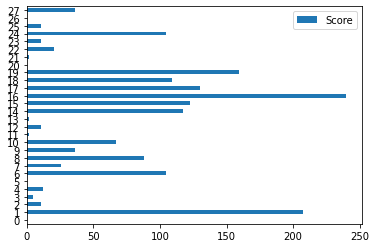

In [23]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [26]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 58.18431753072729
Test Prediction  58.78113015755672


In [28]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  68.97614391865467


In [29]:
y_pred_test1 = logreg.predict(test_XX)
logreg_score_test = accuracy_score(test_YY,y_pred_test1)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  63.797100197255695


In [30]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
3,flit_id,1.979446
17,packet_count_index,1.960976
1,inport,1.871481
0,outport,1.238446
10,hop_count,0.831297
11,current_hop,0.615587
21,flit_index,0.327037
26,sim,0.000000
5,vnet,0.000000
24,vnet_vc_index,-0.033867


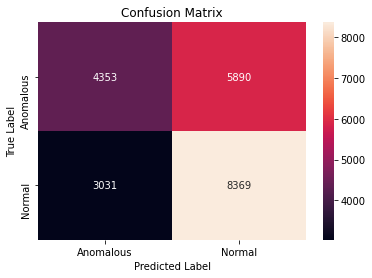

In [31]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.42      0.49     10243
           1       0.59      0.73      0.65     11400

    accuracy                           0.59     21643
   macro avg       0.59      0.58      0.57     21643
weighted avg       0.59      0.59      0.58     21643



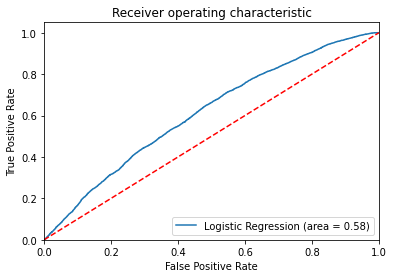

In [33]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

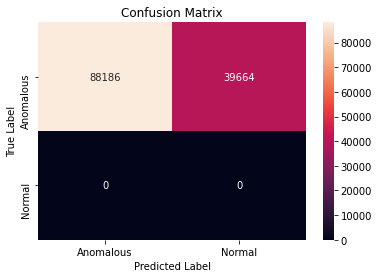

In [34]:
cm = confusion_matrix(test_Y, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [35]:
print(classification_report(test_Y, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.69      0.82    127850
           1       0.00      0.00      0.00         0

    accuracy                           0.69    127850
   macro avg       0.50      0.34      0.41    127850
weighted avg       1.00      0.69      0.82    127850



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [36]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [38]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 80.72613436835783
Test Prediction  71.30249965346763


In [39]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  54.878373093468916


In [40]:
y_pred_knn_test_x= knn.predict(test_XX)
knn_score_test = accuracy_score(test_YY,y_pred_knn_test_x)
print("Test Prediction ",knn_score_test*100)

Test Prediction  39.302837890371904


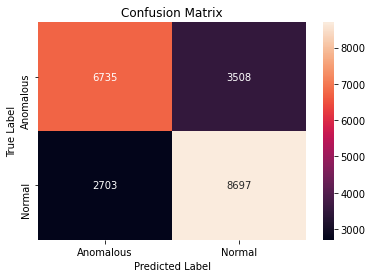

In [41]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [42]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.71      0.66      0.68     10243
           1       0.71      0.76      0.74     11400

    accuracy                           0.71     21643
   macro avg       0.71      0.71      0.71     21643
weighted avg       0.71      0.71      0.71     21643



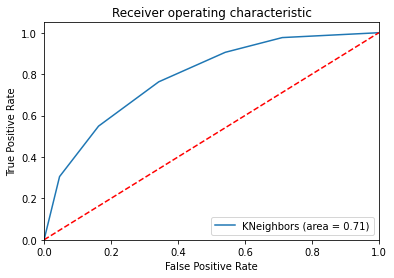

In [43]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

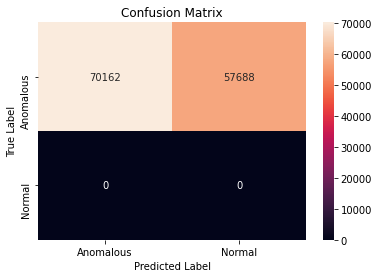

In [44]:
cm = confusion_matrix(test_Y, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [45]:
print(classification_report(test_Y,y_pred_knn_test))

              precision    recall  f1-score   support

           0       1.00      0.55      0.71    127850
           1       0.00      0.00      0.00         0

    accuracy                           0.55    127850
   macro avg       0.50      0.27      0.35    127850
weighted avg       1.00      0.55      0.71    127850



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [47]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [49]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 56.09463081046114
Test Prediction Score 56.341542300050826


In [50]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 57.040281579976536


In [51]:
y_pred_nb_test= nb.predict(test_XX)
nb_score_test = accuracy_score(test_YY,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 33.239744863432826


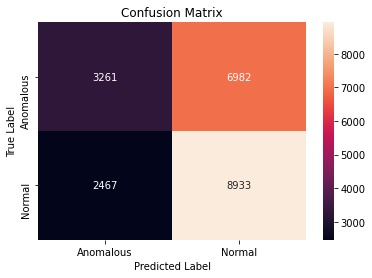

In [52]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [53]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.57      0.32      0.41     10243
           1       0.56      0.78      0.65     11400

    accuracy                           0.56     21643
   macro avg       0.57      0.55      0.53     21643
weighted avg       0.57      0.56      0.54     21643



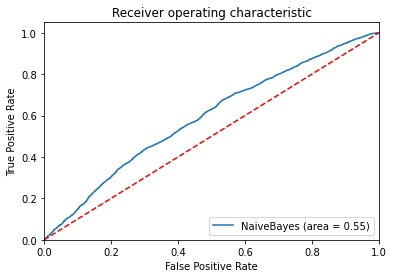

In [54]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [55]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

Using TensorFlow backend.


2-Layer Neural Network

In [56]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 69254 samples, validate on 17314 samples
Epoch 1/10
69254/69254 [==============================] - 3s 41us/step - loss: 0.2495 - accuracy: 0.5258 - val_loss: 0.2470 - val_accuracy: 0.5461
Epoch 2/10
69254/69254 [==============================] - 3s 38us/step - loss: 0.2451 - accuracy: 0.5539 - val_loss: 0.2420 - val_accuracy: 0.5751
Epoch 3/10
69254/69254 [==============================] - 3s 38us/step - loss: 0.2429 - accuracy: 0.5700 - val_loss: 0.2415 - val_accuracy: 0.5751
Epoch 4/10
69254/69254 [==============================] - 3s 38us/step - loss: 0.2425 - accuracy: 0.5688 - val_loss: 0.2410 - val_accuracy: 0.5725
Epoch 5/10
69254/69254 [==============================] - 3s 37us/step - loss: 0.2423 - accuracy: 0.5681 - val_loss: 0.2411 - val_accuracy: 0.5743
Epoch 6/10
69254/69254 [==============================] - 3s 37us/step - loss: 0.2422 - accuracy: 0.5686 - val_loss: 0.2409 - val_accuracy: 0.5761
Epoch 7/10
69254/69254 [==============================] - 3s 38us/st

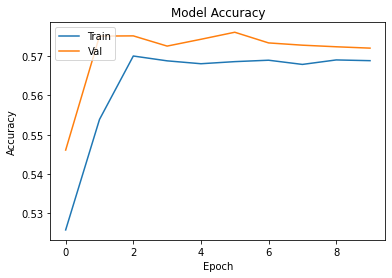

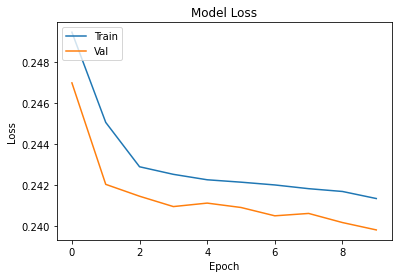

In [57]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [58]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 57.46%


In [59]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 65.92%


3-Layer Neural Network

In [60]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 69254 samples, validate on 17314 samples
Epoch 1/30
69254/69254 [==============================] - 3s 37us/step - loss: 0.2495 - accuracy: 0.5241 - val_loss: 0.2491 - val_accuracy: 0.5290
Epoch 2/30
69254/69254 [==============================] - 3s 37us/step - loss: 0.2493 - accuracy: 0.5232 - val_loss: 0.2491 - val_accuracy: 0.5271
Epoch 3/30
69254/69254 [==============================] - 3s 37us/step - loss: 0.2493 - accuracy: 0.5232 - val_loss: 0.2490 - val_accuracy: 0.5286
Epoch 4/30
69254/69254 [==============================] - 3s 36us/step - loss: 0.2492 - accuracy: 0.5254 - val_loss: 0.2489 - val_accuracy: 0.5322
Epoch 5/30
69254/69254 [==============================] - 3s 37us/step - loss: 0.2489 - accuracy: 0.5309 - val_loss: 0.2486 - val_accuracy: 0.5375
Epoch 6/30
69254/69254 [==============================] - 3s 36us/step - loss: 0.2486 - accuracy: 0.5412 - val_loss: 0.2484 - val_accuracy: 0.5449
Epoch 7/30
69254/69254 [==============================] - 3s 38us/st

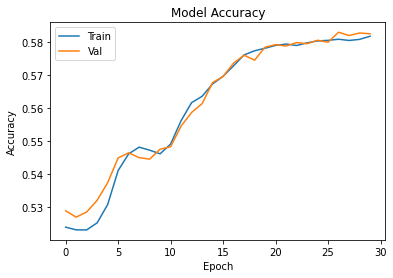

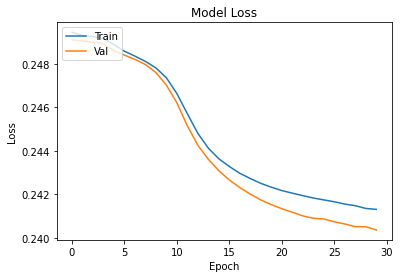

In [61]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [62]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 58.79%


In [63]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 69.73%


In [64]:
scores = model.evaluate(test_XX, test_YY, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 36.17%


4-Layer Neural Network



In [65]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 69254 samples, validate on 17314 samples
Epoch 1/30
69254/69254 [==============================] - 3s 39us/step - loss: 0.2489 - accuracy: 0.5341 - val_loss: 0.2476 - val_accuracy: 0.5449
Epoch 2/30
69254/69254 [==============================] - 3s 38us/step - loss: 0.2467 - accuracy: 0.5501 - val_loss: 0.2451 - val_accuracy: 0.5573
Epoch 3/30
69254/69254 [==============================] - 3s 38us/step - loss: 0.2446 - accuracy: 0.5677 - val_loss: 0.2431 - val_accuracy: 0.5743
Epoch 4/30
69254/69254 [==============================] - 3s 39us/step - loss: 0.2434 - accuracy: 0.5713 - val_loss: 0.2422 - val_accuracy: 0.5736
Epoch 5/30
69254/69254 [==============================] - 3s 41us/step - loss: 0.2427 - accuracy: 0.5715 - val_loss: 0.2416 - val_accuracy: 0.5781
Epoch 6/30
69254/69254 [==============================] - 3s 38us/step - loss: 0.2421 - accuracy: 0.5745 - val_loss: 0.2410 - val_accuracy: 0.5782
Epoch 7/30
69254/69254 [==============================] - 3s 39us/st

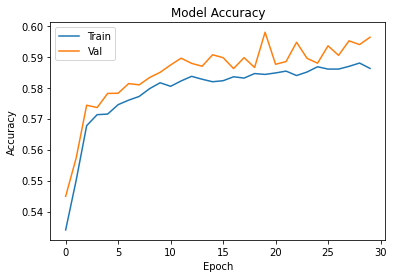

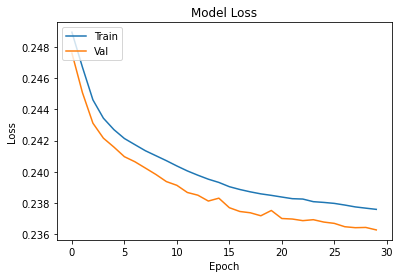

In [66]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [67]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 59.60%


In [69]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 57.34%


In [68]:
scores = model.evaluate(test_XX, test_YY, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 36.00%


5-Layer Neural Network Optimized

In [70]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 69254 samples, validate on 17314 samples
Epoch 1/100
69254/69254 [==============================] - 6s 86us/step - loss: 0.2387 - accuracy: 0.5894 - val_loss: 0.2326 - val_accuracy: 0.6123
Epoch 2/100
69254/69254 [==============================] - 5s 79us/step - loss: 0.2309 - accuracy: 0.6132 - val_loss: 0.2306 - val_accuracy: 0.6129
Epoch 3/100
69254/69254 [==============================] - 5s 77us/step - loss: 0.2258 - accuracy: 0.6282 - val_loss: 0.2221 - val_accuracy: 0.6338
Epoch 4/100
69254/69254 [==============================] - 5s 72us/step - loss: 0.2218 - accuracy: 0.6382 - val_loss: 0.2126 - val_accuracy: 0.6622
Epoch 5/100
69254/69254 [==============================] - 5s 77us/step - loss: 0.2180 - accuracy: 0.6472 - val_loss: 0.2105 - val_accuracy: 0.6751
Epoch 6/100
69254/69254 [==============================] - 5s 73us/step - loss: 0.2134 - accuracy: 0.6564 - val_loss: 0.2050 - val_accuracy: 0.6685
Epoch 7/100
69254/69254 [==============================] - 5s 

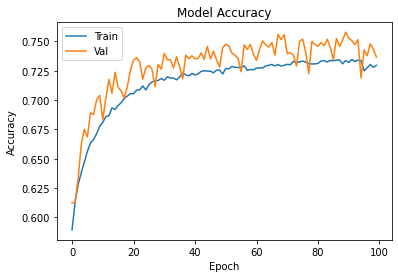

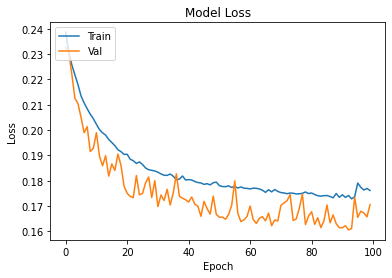

In [71]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [72]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 73.59%


In [73]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 58.12%


In [74]:
scores = model.evaluate(test_XX, test_YY, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 42.00%


In [75]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 69254 samples, validate on 17314 samples
Epoch 1/50
69254/69254 [==============================] - 6s 87us/step - loss: 0.2391 - accuracy: 0.5844 - val_loss: 0.2314 - val_accuracy: 0.6079
Epoch 2/50
69254/69254 [==============================] - 6s 81us/step - loss: 0.2316 - accuracy: 0.6096 - val_loss: 0.2302 - val_accuracy: 0.6119
Epoch 3/50
69254/69254 [==============================] - 5s 76us/step - loss: 0.2280 - accuracy: 0.6197 - val_loss: 0.2266 - val_accuracy: 0.6265
Epoch 4/50
69254/69254 [==============================] - 5s 74us/step - loss: 0.2250 - accuracy: 0.6285 - val_loss: 0.2224 - val_accuracy: 0.6298
Epoch 5/50
69254/69254 [==============================] - 5s 73us/step - loss: 0.2234 - accuracy: 0.6316 - val_loss: 0.2151 - val_accuracy: 0.6517
Epoch 6/50
69254/69254 [==============================] - 5s 71us/step - loss: 0.2203 - accuracy: 0.6389 - val_loss: 0.2144 - val_accuracy: 0.6431
Epoch 7/50
69254/69254 [==============================] - 5s 71us/st

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
# GridSearchCV
param_grid={'max_depth':range(0,29,2) ,
            'max_features':range(0,29,2)}
dt_g=DecisionTreeClassifier(random_state = 42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=3,scoring='accuracy',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

In [77]:
dt = DecisionTreeClassifier(max_depth=28,max_features=28,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=28, max_features=28, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [79]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 99.00540615469919
Test Prediction Score 91.78949313865915


In [80]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 50.251857645678534


In [81]:
y_pred_dt_test= dt.predict(test_XX)
dt_score_test = accuracy_score(test_YY,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 41.52304436093473


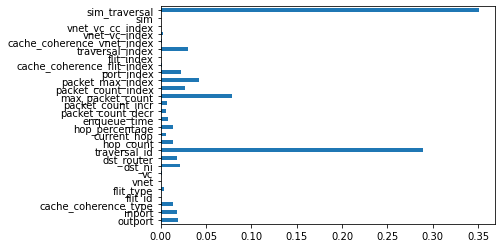

In [82]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

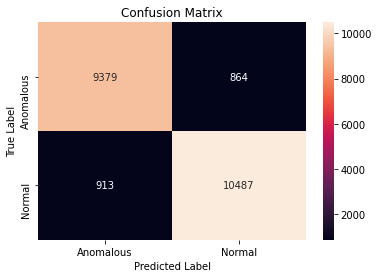

In [83]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [84]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91     10243
           1       0.92      0.92      0.92     11400

    accuracy                           0.92     21643
   macro avg       0.92      0.92      0.92     21643
weighted avg       0.92      0.92      0.92     21643



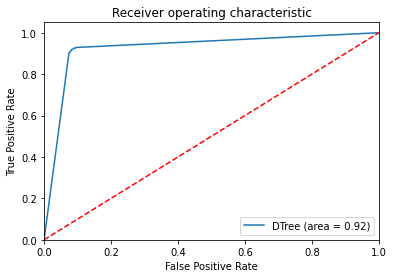

In [85]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
# GridSearchCV
param_grid={'max_depth':range(0,25,2),
            'n_estimators':[125,250],
            'max_features':range(0,25,2)}
dt_g=RandomForestClassifier(random_state=42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='f1_micro',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

In [87]:
rf = RandomForestClassifier(max_depth=28,max_features=28,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=28, max_features=28,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [89]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 99.79438129562887
Test Prediction Score 92.49641916555007


In [0]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 61.21314039890496


In [90]:
y_pred_rf_test= rf.predict(test_XX)
rf_score_test = accuracy_score(test_YY,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 39.217888356154525


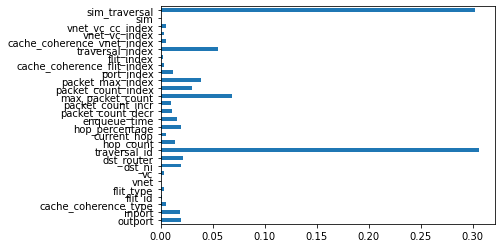

In [91]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

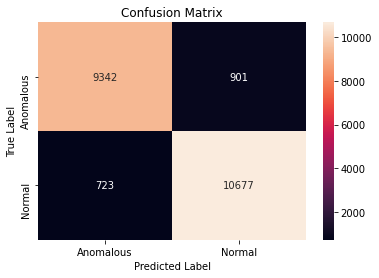

In [92]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [93]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     10243
           1       0.92      0.94      0.93     11400

    accuracy                           0.92     21643
   macro avg       0.93      0.92      0.92     21643
weighted avg       0.93      0.92      0.92     21643



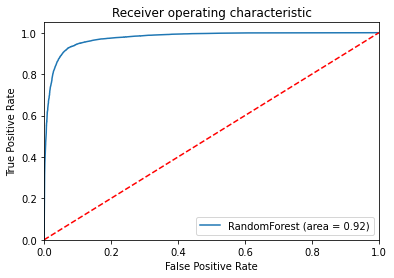

In [94]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
# GridSearchCV
param_grid={'max_depth':range(0,25,2),
            'n_estimators':[125,250,500],
           'min_child_weight':[1,3,6]}
xgb_g=XGBClassifier(random_state=42)
xgb_cv=GridSearchCV(xgb_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
xgb_cv.fit(X_train,y_train)

print("Best parameters:",xgb_cv.best_params_)
print("Accuracy :",xgb_cv.best_score_)

In [96]:
xgbc = XGBClassifier(max_depth=28,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=28,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [98]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.7978467794104
Test Prediction Score 95.03303608557039


In [0]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

In [100]:
y_pred_xgbc_test= xgbc.predict(test_XX)
xgbc_score_test = accuracy_score(test_YY,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 40.437418110088835


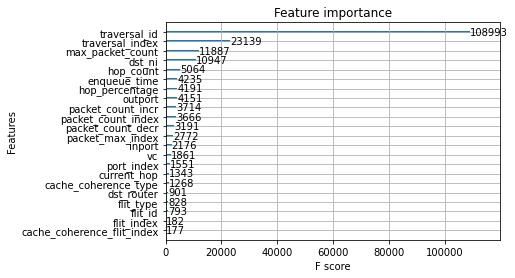

In [101]:
plot_importance(xgbc)
plt.show()

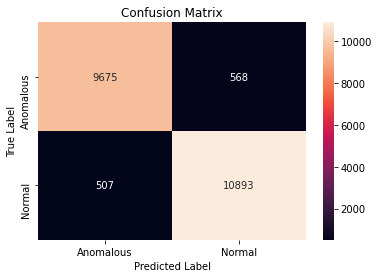

In [102]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [103]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     10243
           1       0.95      0.96      0.95     11400

    accuracy                           0.95     21643
   macro avg       0.95      0.95      0.95     21643
weighted avg       0.95      0.95      0.95     21643



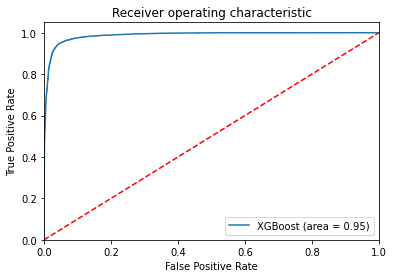

In [104]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [0]:
# GridSearchCV
param_grid = {'n_estimators': [x for x in range(24,40,2)],
              'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
lgb_g = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', n_estimators = 20, num_leaves = 38)
lgb_cv = GridSearchCV(lgb_g, param_grid,cv=10)
lgb_cv.fit(X_train, y_train)

print("Best parameters:",lgb_cv.best_params_)
print("Accuracy :",lgb_cv.best_score_)

In [106]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 28, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=28,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [108]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 87.98978837445708
Test Prediction Score 84.6878898489119


In [109]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 61.22565506452875


In [110]:
y_pred_gbm_test = gbm.predict(test_XX)
gbm_score_test = accuracy_score(test_YY,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 35.645688451182814


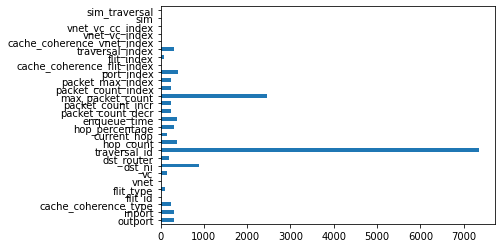

In [111]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

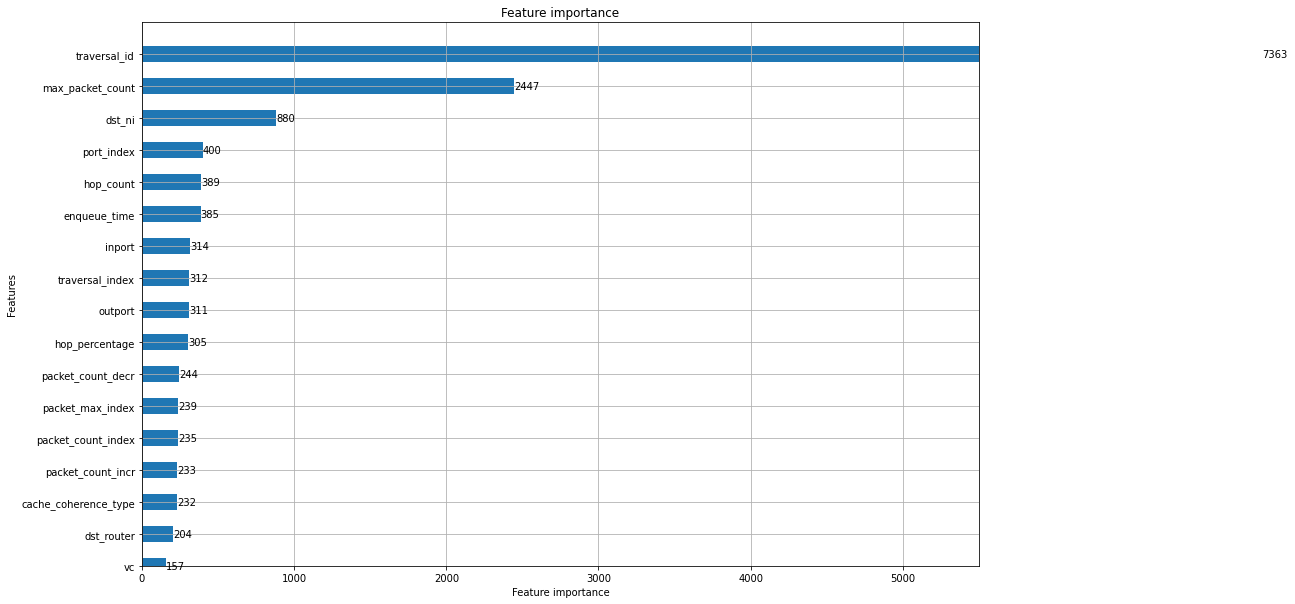

In [112]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,5500), ylim = (0,17), figsize = (15,10))
plt.show()

In [113]:
sorted(gbm.feature_importances_,reverse=True)

[7363,
 2447,
 880,
 400,
 389,
 385,
 314,
 312,
 311,
 305,
 244,
 239,
 235,
 233,
 232,
 204,
 157,
 146,
 100,
 68,
 20,
 16,
 0,
 0,
 0,
 0,
 0,
 0]

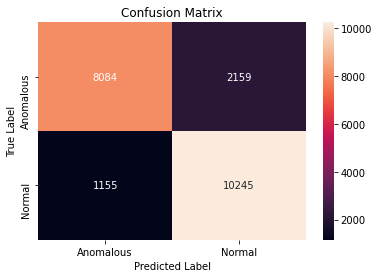

In [114]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [115]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83     10243
           1       0.83      0.90      0.86     11400

    accuracy                           0.85     21643
   macro avg       0.85      0.84      0.85     21643
weighted avg       0.85      0.85      0.85     21643



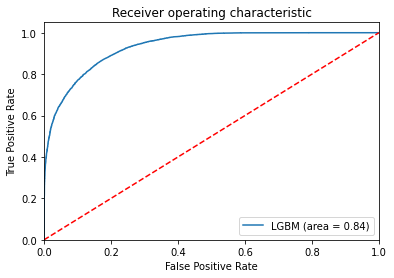

In [116]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()